<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/27_heatmap_Q_and_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn Heatmap Q&A

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
sns.__version__

'0.13.2'

In [ ]:
cars = sns.load_dataset('mpg')

In [ ]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Does the Seaborn Heatmap accept MultiIndex DataFrames?  Yes.

In [ ]:
grp_cyl = (cars
           .groupby('origin')
           .cylinders
           .value_counts()
          )

In [ ]:
grp_cyl

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: count, dtype: int64

This series must be converted to a pandas DataFrame.  But a MultiIndex is allowed and will just be hyphenated by Seaborn.

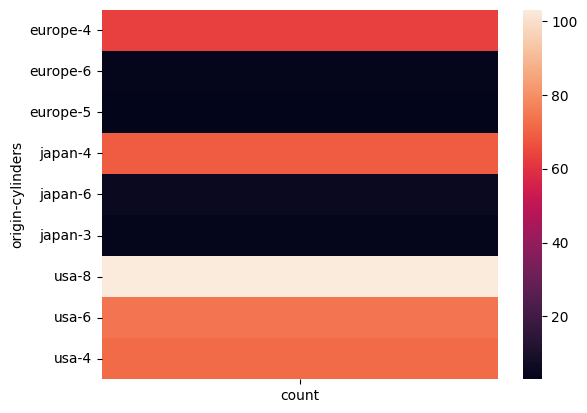

In [ ]:
sns.heatmap(pd.DataFrame(grp_cyl))

In [ ]:
grp_year = (cars
            .groupby(['origin', 'model_year'])
            [['cylinders', 'displacement']]
            .mean()
           )

In [ ]:
grp_year.sample(5, random_state=11)

cylinders  displacement
origin model_year                         
usa    75           6.400000    253.400000
japan  80           4.076923    104.615385
       76           4.500000    107.250000
europe 78           4.833333    126.166667
       79           4.250000    126.000000

**!!!** Be careful about scale though!  

Average cylinders is much smaller than average displacement, so the heatmap maps the entire cylinders column to a similar color.

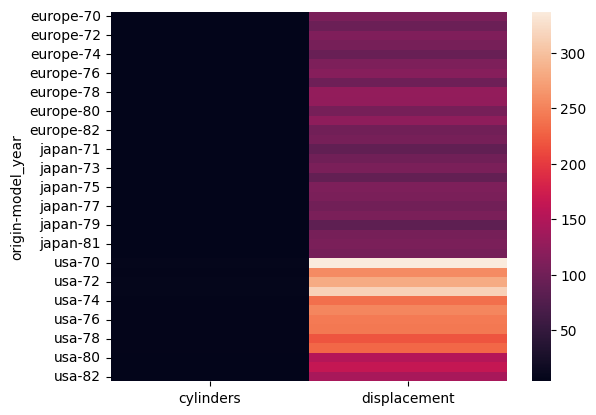

In [ ]:
sns.heatmap(grp_year)

## What does the mask argument do?

Here's a simple example of the mask argument.  Starting with `a`, a 2x3 numpy array, we create `mask`, which should also be 2x3.  Then pass `mask` to the mask argument in the heatmap.  Positions that are marked `True` in the mask will not appear in the heatmap.

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
mask = np.array([[False, False, False], [True, True, True]])

mask

array([[False, False, False],
       [ True,  True,  True]])

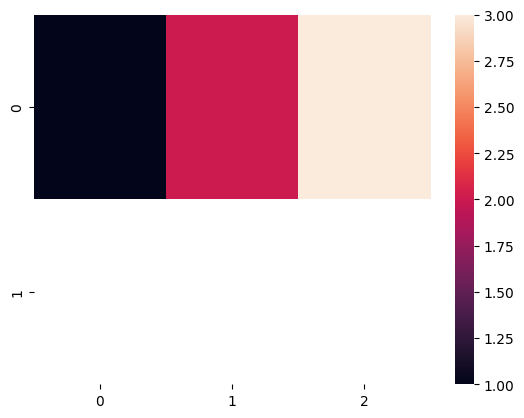

In [ ]:
sns.heatmap(a, mask=mask)

And working with the dataframe from the video:

In [ ]:
origin_cyl = (
    cars
    .groupby('origin')
    .cylinders
    .value_counts()
    .unstack()
    .fillna(0)
)

In [ ]:
origin_cyl.shape

(3, 5)

Start with a matrix of zeros which will be treated as `False` by Python.

In [ ]:
mask = np.zeros(origin_cyl.shape)

Update the positions that you want to mask with `True` values.

In [ ]:
mask[0, 3] = True
mask[0, 4] = True
mask[1, 4] = True

mask

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

Pass the mask to the mask argument and those rectangles that are marked `True` will not appear.

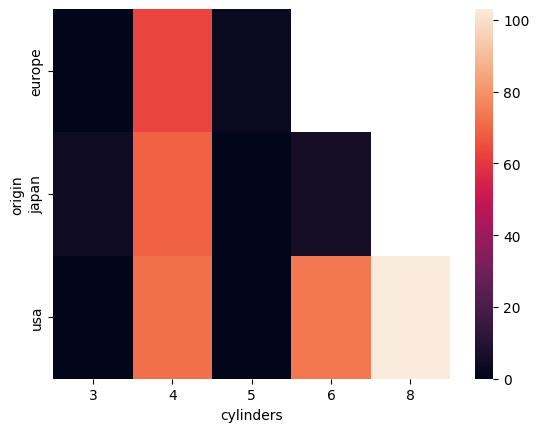

In [ ]:
sns.heatmap(origin_cyl, mask=mask)